In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)

2.3.0


In [ ]:
# Google Drive 에 저장되어 있는 diabetes,csv 파일을 읽어들이기 위해서
# Colab 의 /content/gdrive/ 에 Google Drive 마운트 시킴

from google.colab import drive   # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

drive.mount('/content/gdrive/')  # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
# 마운트된 Google Drive 의 working directory 이동

import os

working_dir = 'dataset'

# Google Drive 에서 Colab Default Directory
colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'

original_dir = os.getcwd()  # save current dir

try:

    os.chdir(colab_default_dir)

    if not os.path.exists(working_dir):
        os.mkdir(working_dir)

    os.chdir(working_dir)  # change working dir
    print('current dir = ', os.getcwd())

except Exception as err:
    
    os.chdir(original_dir)
    print(str(err))

current dir =  /content/gdrive/My Drive/Colab Notebooks/tensorflow_2.x_working_dir


In [ ]:
# loadtxt() 이용해서 diabetes.csv 읽어들임

import numpy as np

try:

    loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

    # training data / test data 분리

    seperation_rate = 0.3  # 분리 비율
    test_data_num = int(len(loaded_data) * seperation_rate)

    np.random.shuffle(loaded_data)

    test_data = loaded_data[ 0:test_data_num ]
    training_data = loaded_data[ test_data_num: ]

    # training_x_data / training_t__data 생성

    training_x_data = training_data[ :, 0:-1]
    training_t_data = training_data[ :, [-1]]

    # test_x_data / test_t__data 생성
    test_x_data = test_data[ :, 0:-1]
    test_t_data = test_data[ :, [-1]]

    print("loaded_data.shape = ", loaded_data.shape)
    print("training_x_data.shape = ", training_x_data.shape)
    print("training_t_data.shape = ", training_t_data.shape)

    print("test_x_data.shape = ", test_x_data.shape)
    print("test_t_data.shape = ", test_t_data.shape)

except Exception as err:

    print(str(err))

loaded_data.shape =  (759, 9)
training_x_data.shape =  (532, 8)
training_t_data.shape =  (532, 1)
test_x_data.shape =  (227, 8)
test_t_data.shape =  (227, 1)


In [ ]:
# Logistic Regression 을 keras 이용하여 생성

model = Sequential()

# 노드 1개인 출력층 생성
model.add(Dense(training_t_data.shape[1], 
                input_shape=(training_x_data.shape[1],),
                activation='sigmoid'))  

In [ ]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=0.01), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(training_x_data, training_t_data, epochs=500, validation_split=0.2, verbose=2)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/500
14/14 - 0s - loss: 0.8111 - accuracy: 0.3647 - val_loss: 0.7422 - val_accuracy: 0.4860
Epoch 2/500
14/14 - 0s - loss: 0.8008 - accuracy: 0.3929 - val_loss: 0.7315 - val_accuracy: 0.4953
Epoch 3/500
14/14 - 0s - loss: 0.7917 - accuracy: 0.4165 - val_loss: 0.7215 - val_accuracy: 0.5047
Epoch 4/500
14/14 - 0s - loss: 0.7831 - accuracy: 0.4235 - val_loss: 0.7134 - val_accuracy: 0.5140
Epoch 5/500
14/14 - 0s - loss: 0.7761 - accuracy: 0.4376 - val_loss: 0.7069 - val_accuracy: 0.5234
Epoch 6/500
14/14 - 0s - loss: 0.7700 - accuracy: 0.4447 - val_loss: 0.7008 - val_accuracy: 0.5514
Epoch 7/500
14/14 - 0s - loss: 0.7644 - accuracy: 0.4565 - val_loss: 0.6941 - val_accuracy: 0.5514
Epoch 8/500
14/14 - 0s - loss: 0.7585 - accuracy: 0.4706 - val_loss: 0.6885 - val_accuracy: 0.5981
Epoch 9/500
14/14 - 0s - loss: 0.7534 - accuracy: 0.4847 - val_loss: 0.6832 - val_accuracy: 0.6075
Epoch 10/500
14/14 - 0s - loss: 0.7486 - accuracy: 0.4941 - val_loss: 0.6793 - val_accuracy: 0.6262
Epoch 11/

In [ ]:
model.evaluate(test_x_data, test_t_data)

8/8 [==============================] - 0s 3ms/step - loss: 0.5057 - accuracy: 0.7313


[0.5056570768356323, 0.7312775254249573]

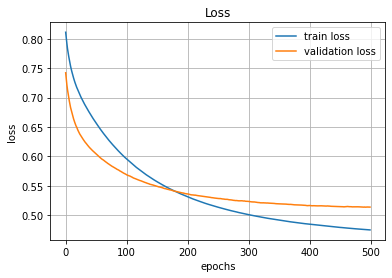

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

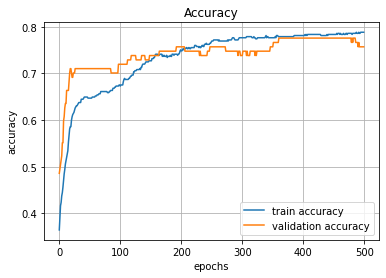

In [ ]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()